<a href="https://colab.research.google.com/github/Martin-Msb/context-aware-recommendation/blob/main/context_aware_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This research notebook is part of DAMI II course at DSV - HT2022

### Authors: © 2022 Martin Masaba & Edda Waciira

# Dowload H&M dataset from Kaggle

Install Kaggle library

In [1]:
!pip install kaggle

     |████████████████████████████████| 58 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.9 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=17294f5708dfbbf71d196a8ae02cd99a9d6f7c89c57ca95d926c42a2ebfa880b
  Stored in directory: /home/marmas6/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [6]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

Download dataset

In [8]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100%|█████████████████████████████████████▉| 28.7G/28.7G [08:24<00:00, 63.3MB/s]
100%|██████████████████████████████████████| 28.7G/28.7G [08:24<00:00, 61.1MB/s]


Unzip data into working dir

In [ ]:
!unzip h-and-m-personalized-fashion-recommendations

In [1]:
#Install these in env
!pip install pandas

  Using cached pandas-1.5.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached pytz-2022.7-py2.py3-none-any.whl (499 kB)


In [2]:
!pip install numpy

In [3]:
!pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached contourpy-1.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached Pillow-9.3.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.3 MB)


In [4]:
!pip3 install -U scikit-learn

  Using cached scikit_learn-1.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.7 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scipy-1.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [5]:
!python -m pip install -U matplotlib

In [6]:
!pip install implicit

  Using cached implicit-0.6.2-cp38-cp38-manylinux2014_x86_64.whl (18.6 MB)


In [7]:
#Import libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
from PIL import Image
import glob
import warnings
warnings.filterwarnings('ignore')

#No normal distribution in age column
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import implicit

### Data Preprocesing
**Customers Data**

In [8]:
customers_df = pd.read_csv('customers.csv')

In [9]:
customers_df.shape

(1371980, 7)

In [10]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [13]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [14]:
member_status = pd.DataFrame(customers_df['club_member_status'].value_counts()/customers_df['club_member_status'].shape[0] * 100)
member_status

,club_member_status
ACTIVE,92.748509
PRE-CREATE,6.775609
LEFT CLUB,0.034038


'pre-create' and 'left-club' seems to be very small groups, so we can drop the rows

In [15]:
customers_df.drop(customers_df.index[customers_df['club_member_status'] != 'ACTIVE'], inplace=True)

customers_df.club_member_status.value_counts()

ACTIVE    1272491
Name: club_member_status, dtype: int64

In [16]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
None              2
Name: fashion_news_frequency, dtype: int64

In [17]:
customers_df['fashion_news_frequency'].replace('None', np.nan, inplace=True)

In [18]:
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Monthly         778
Name: fashion_news_frequency, dtype: int64

In [19]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [20]:
customers_df = customers_df.dropna(subset =['fashion_news_frequency'])

In [21]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', 'Monthly'], dtype=object)

In [22]:
customers_df.isnull().sum()

customer_id                    0
FN                        789740
Active                    802113
club_member_status             0
fashion_news_frequency         0
age                         6168
postal_code                    0
dtype: int64

In [23]:
avg_age = customers_df.age.mean()
max_age = customers_df.age.max()
min_age = customers_df.age.min()

print('The average age is {}, the max age is {} and the min age is {}'
      .format(avg_age, max_age, min_age))

The average age is 36.067268231084924, the max age is 99.0 and the min age is 16.0


<AxesSubplot: title={'center': 'Customers Ages'}, xlabel='Age Bins', ylabel='Count'>

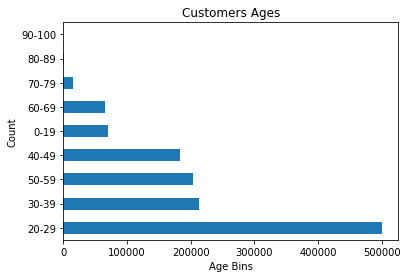

In [24]:
bins = 0, 19, 29, 39, 49, 59, 69, 79,89,100
customers_df['age_bins'] = pd.cut(customers_df.age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])


customers_df.age_bins.value_counts().plot(kind = 'barh', title = 'Customers Ages', xlabel = 'Age Bins', ylabel= 'Count')

In [25]:
#Should drop some ages here
age_bins = pd.DataFrame(customers_df['age_bins'].value_counts()/customers_df['age_bins'].shape[0] * 100)
age_bins

,age_bins
20-29,39.701991
30-39,16.920045
50-59,16.194259
40-49,14.584027
0-19,5.516975
60-69,5.223059
70-79,1.264117
80-89,0.099797
90-100,0.006426


In [26]:
customers_df = customers_df.drop(customers_df[(customers_df['age'] >= 50) | (customers_df['age'] <= 20)].index)

In [27]:
customers_df.age_bins.value_counts()

20-29     447303
30-39     213288
40-49     183841
0-19           0
50-59          0
60-69          0
70-79          0
80-89          0
90-100         0
Name: age_bins, dtype: int64

In [28]:
#drop unnecessary columns
customers_df.drop(['age_bins', 'postal_code'], axis = 1, inplace =True)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,NONE,29.0
...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0


In [29]:
customers_df.isnull().sum()

customer_id                    0
FN                        547750
Active                    556125
club_member_status             0
fashion_news_frequency         0
age                         6168
dtype: int64

According to the owner of the dataset, 'FN' is if a customer get Fashion News newsletter, 'Active' is if the customer is active for communication.
See more [here](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/307001)

As such, the value 1.0 in these two columns can be interpreted as 'true' and as such, np.nan can be intepreted as 'false'.

Therefore, these values can be replaced with 0

In [30]:
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

In [31]:
customers_df.FN.value_counts()

0.0    547750
1.0    302850
Name: FN, dtype: int64

In [32]:
customers_df.Active.value_counts()

0.0    556125
1.0    294475
Name: Active, dtype: int64

In [33]:
customers_df.isnull().sum()

customer_id                  0
FN                           0
Active                       0
club_member_status           0
fashion_news_frequency       0
age                       6168
dtype: int64

Only the 'age' has nan values now and since they are not many, it is possible to drop these rows

In [34]:
customers_df = customers_df.dropna(subset =['age'])

In [35]:
customers_df.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
dtype: int64

**Scaling numeric columns**

There are three numerical columns (FN, Active & age). But FN and Active have 1 and 0 values representing truth or false.

As such, only age should be scaled. Below we check the dristribution of age so as to decide the best sclaing method to use.

In [36]:
customers_df['age'].describe()

count    844432.000000
mean         31.333135
std           8.536422
min          21.000000
25%          24.000000
50%          29.000000
75%          37.000000
max          49.000000
Name: age, dtype: float64

<AxesSubplot: xlabel='age', ylabel='Count'>

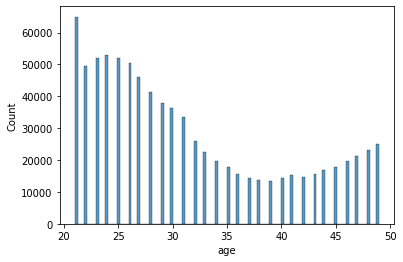

In [37]:
sns.histplot(customers_df['age'])

<AxesSubplot: ylabel='Density'>

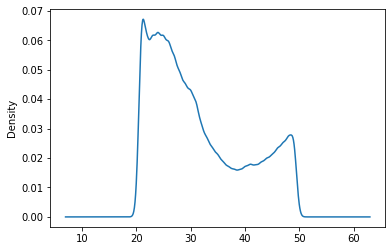

In [38]:
customers_df['age'].plot(kind='kde')

In [39]:
scaler = MinMaxScaler()

In [40]:
age_col = customers_df[['age']]

age_col.shape

(844432, 1)

In [41]:
scaler.fit(age_col)
age_scaled = scaler.transform(age_col)

In [42]:
age_scaled.shape

(844432, 1)

In [43]:
customers_df = customers_df.assign(age_scaled=age_scaled)

In [44]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714
...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000


In [45]:
categorical_cols = ['club_member_status', 'fashion_news_frequency']

In [46]:
categorical_cols

['club_member_status', 'fashion_news_frequency']

**Enconding Categorical Columns**

In [47]:
customers_df[categorical_cols].nunique()

club_member_status        1
fashion_news_frequency    3
dtype: int64

In [48]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [49]:
encoder.fit(customers_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [50]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['club_member_status_ACTIVE', 'fashion_news_frequency_Monthly', 'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly']


In [51]:
customers_df[encoded_cols] = encoder.transform(customers_df[categorical_cols])

In [52]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_scaled,club_member_status_ACTIVE,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,1.000000,1.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,0.142857,1.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,0.392857,1.0,0.0,0.0,1.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,0.0,0.0,ACTIVE,NONE,29.0,0.285714,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0,0.035714,1.0,0.0,0.0,1.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0,0.000000,1.0,0.0,0.0,1.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,0.107143,1.0,0.0,1.0,0.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,0.000000,1.0,0.0,1.0,0.0


In [53]:
customers_num_df = customers_df[['FN', 'Active','age_scaled','fashion_news_frequency_Monthly','fashion_news_frequency_NONE','fashion_news_frequency_Regularly']]

In [54]:
customers_num_df.corr()

,FN,Active,age_scaled,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_Regularly
FN,1.000000,0.978589,0.018760,0.032688,-0.994511,0.993181
Active,0.978589,1.000000,0.020216,0.031154,-0.974137,0.972880
age_scaled,0.018760,0.020216,1.000000,0.004650,-0.018578,0.018341
fashion_news_frequency_Monthly,0.032688,0.031154,0.004650,1.000000,-0.033770,-0.018852
fashion_news_frequency_NONE,-0.994511,-0.974137,-0.018578,-0.033770,1.000000,-0.998615
fashion_news_frequency_Regularly,0.993181,0.972880,0.018341,-0.018852,-0.998615,1.000000


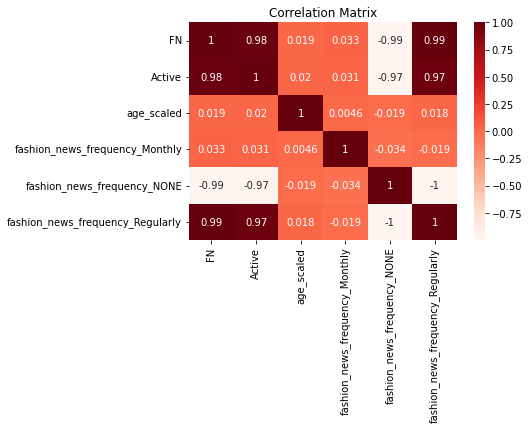

In [55]:
sns.heatmap(customers_num_df.corr(), cmap ='Reds', annot = True)
plt.title('Correlation Matrix');

**Articles Data**

In [62]:
articles_df = pd.read_csv('articles.csv')

In [63]:
articles_df.shape

(105542, 25)

In [64]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [65]:
articles_df.shape

(105542, 25)

In [66]:
articles_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [71]:
articles_df = articles_df.dropna()

<AxesSubplot: >

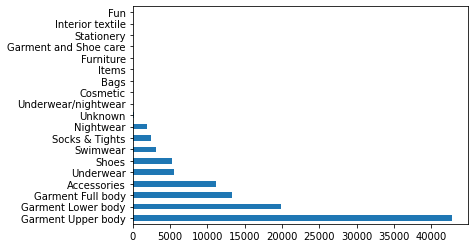

In [68]:
articles_df.product_group_name.value_counts().plot(kind = 'barh')

<AxesSubplot: >

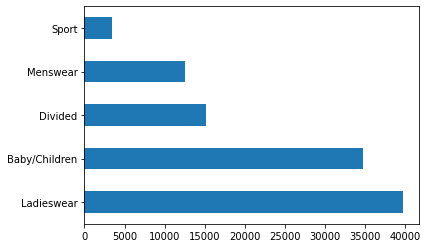

In [69]:
articles_df.index_group_name.value_counts().plot(kind = 'barh')

**Transactions Data**

In [77]:
transactions_df = pd.read_csv('transactions_train.csv', parse_dates=["t_dat"])

In [78]:
transactions_df.dtypes

t_dat               datetime64[ns]
customer_id                 object
article_id                   int64
price                      float64
sales_channel_id             int64
dtype: object

In [79]:
transactions_df.shape

(31788324, 5)

In [80]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [81]:
transactions_df['t_dat'].max()

Timestamp('2020-09-22 00:00:00')

A total of 31,788,324 transactions made by 1,371,980 customers as seen from the cutomers_df. The first transaction was on 20/09/2018 and the last transaction was on 20/09/2020

In [82]:
#number of unique values
transactions_df['customer_id'].nunique()

1362281

<AxesSubplot: >

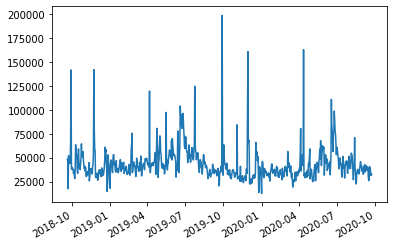

In [83]:
transactions_df['t_dat'].value_counts().plot()

**Merge the dataframes**

In [87]:
%%time
merged_df = transactions_df.merge(articles_df, on='article_id')
final_df = merged_df.merge(customers_df, on='customer_id')

CPU times: user 1min 45s, sys: 17.2 s, total: 2min 2s
Wall time: 2min 2s


In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22974093 entries, 0 to 22974092
Data columns (total 39 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   t_dat                             datetime64[ns]
 1   customer_id                       object        
 2   article_id                        int64         
 3   price                             float64       
 4   sales_channel_id                  int64         
 5   product_code                      int64         
 6   prod_name                         object        
 7   product_type_no                   int64         
 8   product_type_name                 object        
 9   product_group_name                object        
 10  graphical_appearance_no           int64         
 11  graphical_appearance_name         object        
 12  colour_group_code                 int64         
 13  colour_group_name                 object        
 14  perceived_colour

In [106]:
#convert string customer IDs to numeric type, article IDs already ints
final_df['customerID'] = final_df['customer_id'].astype('category').cat.codes

In [104]:
n_customers = n_purchases.customerID.unique().shape[0]
n_articles = n_purchases.article_id.unique().shape[0]
print('Number of customers = ' + str(n_customers)) 
print('============================')
print('Number of articles = ' + str(n_articles)) 

Number of customers = 838511
Number of articles = 102733


**Explain the Recommendation System Problem**

### Collaborative Filtering

**1. Customer based CF**

Split dataframe into training and testing. Since the last day of transactions is 22/09/2020, the training data will be upto 15/09/2020, 7 days before the last transaction was made.

In [70]:
#trans_dates = final_df['t_dat']
#train_data = final_df[(trans_dates >= '2018-09-20 00:00:00') & (trans_dates < '2020-09-15 00:00:00')]
#test_data = final_df[(trans_dates >= '2020-09-15 00:00:00')]

The next 7 days of transactions have been preserved for predictions

In [ ]:
#Content-based filtering
#Recommend products based on what users have liked in the past i.e. User-Product and product-product
#Product attributes are necessary for content based filtering and not for collaborative filtering
#Attributes like t-shirt, black, nike, has graphic etc

In [ ]:
#Collaborative filtering 
#Type of data
#User behaviour (need many "ratings"), if data has no product attributes, them we can not use content based filtering

**A look at the images**

In [68]:
os.getcwd()

'/home/marmas6/context-aware-recommendation'

In [69]:
images_root = r'/home/marmas6/context-aware-recommendation/images'

In [71]:
#Returns dir, sub-dirs & image file paths
root_dirs = []
sub_dirs = []
image_files = []

for roots, sub_dir, files in os.walk(images_root):
  for file in files:
    if file.endswith(".jpg"):
      root_dirs.append(roots)
      sub_dirs.append(os.path.join(roots, file))
      image_files.append(file)

In [72]:
image_files[0:10]

['0108775015.jpg',
 '0108775044.jpg',
 '0108775051.jpg',
 '0110065001.jpg',
 '0110065002.jpg',
 '0110065011.jpg',
 '0111565001.jpg',
 '0111565003.jpg',
 '0111586001.jpg',
 '0111593001.jpg']

In [73]:
counter = 0
for item in image_files:
 counter+=1
print('The number of images in the images folder are:', counter)

The number of images in the images folder are: 105100


In [74]:
#Extract some images here

**Dataset Explanation**

Implicit VS Explicit User feedback

**Option 1: Recommendation System using Explicit data, consider contextual attributes**

Manipulate the data to provide a scoring/rating to customer-article interactions

Build models based on this!

In [116]:
#A scoring could be? Keep the server running

**Option 2: Deal directly with implicit feedback to build a recommendation system, consider context attributes**

Since no explicit feedback from customers e.g ratings, as seen in most recommender applications,  we can only rely on implicit customer feedback instead.

In our case, we have no explicit indication that a customer liked or disliked the articles they purchased from H&M! Buying an article doesn't mean it was liked!

**Background on implicit feedback**

Implicit feedback is explained in an ineresting paper by [Hu et al. (2008)](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi899eAu6baAhUurlkKHaVvB6UQFggsMAA&url=http%3A%2F%2Fyifanhu.net%2FPUB%2Fcf.pdf&usg=AOvVaw3WIcPGTpxR8m7C32F8whFx) 

A user-item interactions are recorded $r_{u,i}$ denoting the level of user interaction $u$ with a particular item $i$. For example, if a customer of ID $1$ purchased an article of ID $4$ once, we set $r_{1,4}=1$. We can also set $r_{u,i}$ to hold information about how many times an article was purchased by a customer. 

Given the set of observations $r_{u,i}$, a binary indicator $p_{u,i}$ is introduced where:

$$ p_{u,i} = \begin{cases} 1 & \mbox{if } r_{i,j}>0 \\
0 & \mbox{otherwise.} \end{cases} $$


A confidence parameter $\alpha$ lets the user determine how much importance they wish to place on the recorded $r_{u,i}$. This leads to the introduction of $c_{u,i}$ which we take to be the confidence we have in the strength of user $u$'s reaction to product $i$: 
$c_{u,i} = 1 + \alpha r_{u,i}$.

Let $N_u$ denote the number of users, and $N_p$ denote the number of products. Let $k\in \mathbb{R}^+$ be a user defined number of factors.

Now, in implicit feedback, the goal is to find matrices $X\in \mathbb{R}^{N_u \times k}$ and $Y\in \mathbb{R}^{N_p \times k}$ such that the following cost function is minimised:

$$\sum_{u,i} c_{u,i}(p_{u,i}-X_u^T Y_i)^2 + \lambda (\sum_u \| X_u\|^2 + \sum_{i} \| y_u\|^2), $$

where
$X_u$ is the $u$th row of X, 
$Y_i$ is the $i$th row of Y,
$\lambda$ term is a user defined parameter which prevents overfitting. 

With this minimisation at hand, we are able to recover estimates of $c_{u,i}$, and thus of $r_{u,i}$ for interactions which have not yet occured.

Add the articles bought by a certain customer as an implicit feedback signal!

In [111]:
#Number of each article bought by a particular customer
n_purchases_each = pd.DataFrame(final_df.groupby(['t_dat','customerID','article_id', 'age']).size(), columns= ['purchases'])

In [112]:
n_purchases_each

purchases
t_dat      customerID article_id age            
2018-09-20 2          541518023  24.0          1
                      663713001  24.0          1
           3          505221001  32.0          1
                      505221004  32.0          1
                      685687001  32.0          1
...                                          ...
2020-09-22 837971     910949002  30.0          1
           838335     891322004  32.0          1
                      929511001  32.0          1
           838368     833459002  21.0          1
           838497     898573003  29.0          1

[20626257 rows x 1 columns]

In [113]:
#Total number of articles purchased by each customers
n_purchases = n_purchases_each.reset_index(level=['t_dat','customerID','article_id', 'age']).sort_values(by=['purchases', 'customerID'], ascending=False)

In [114]:
n_purchases

,t_dat,customerID,article_id,age,purchases
770763,2018-10-14,681101,678342001,27.0,570
4068504,2019-02-16,485434,629420001,23.0,199
5680530,2019-04-15,771944,685347001,36.0,130
11091378,2019-09-28,303554,688558002,26.0,121
11610612,2019-10-16,4282,756322001,27.0,120
...,...,...,...,...,...
15256470,2020-03-21,0,841260003,49.0,1
15256471,2020-03-21,0,859416011,49.0,1
15256472,2020-03-21,0,887593002,49.0,1
15256473,2020-03-21,0,890498002,49.0,1


Young customers tend to buy most items. The number of purchases decreases with age!

The dataset is quite huge and with computational constraints, we decide to take a portion. Selection can be based on the age, date ....

In [181]:
#Use only part of the data to try out!
trans_dates = n_purchases['t_dat']
model_data = n_purchases[(trans_dates >= '2020-04-01 00:00:00') & (trans_dates < '2020-06-30 00:00:00')]

In [182]:
model_data

,t_dat,customerID,article_id,age,purchases
16558628,2020-05-11,381401,685816001,34.0,48
18259368,2020-06-27,601607,756322001,21.0,46
16337735,2020-04-30,656075,812464001,24.0,43
18204270,2020-06-26,512390,599719054,27.0,41
16039749,2020-04-18,487545,835607002,24.0,36
...,...,...,...,...,...
16028421,2020-04-18,2,858883002,24.0,1
16109276,2020-04-22,1,351484002,25.0,1
16109277,2020-04-22,1,559630026,25.0,1
16109279,2020-04-22,1,599580083,25.0,1


In [183]:
from sklearn.model_selection import train_test_split
train, cros_val = train_test_split(model_data, test_size = 0.2, random_state = 1)

In [184]:
train, test = train_test_split(train, test_size = 0.25, random_state = 1)

In [185]:
print('Train, Test and Validation sets')
print('================================')
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('cros_val shape:',cros_val.shape)

Train, Test and Validation sets
Train shape: (1714290, 5)
Test shape: (571430, 5)
cros_val shape: (571431, 5)


In [186]:
import scipy.sparse as sparse

In [175]:
customer_articles = sparse.csr_matrix((train['purchases'].astype(float),(train['customerID'], train['article_id'])))
article_customers = sparse.csr_matrix((train['purchases'].astype(float),(train['article_id'], train['customerID'])))

In [187]:
print(article_customers)

  (108775015, 385727)	1.0
  (108775015, 529359)	1.0
  (108775044, 1823)	1.0
  (108775044, 4481)	1.0
  (108775044, 49144)	1.0
  (108775044, 54351)	1.0
  (108775044, 60442)	1.0
  (108775044, 171220)	2.0
  (108775044, 193353)	1.0
  (108775044, 195644)	1.0
  (108775044, 221766)	1.0
  (108775044, 229350)	1.0
  (108775044, 251874)	1.0
  (108775044, 254827)	2.0
  (108775044, 273105)	1.0
  (108775044, 282874)	1.0
  (108775044, 298625)	1.0
  (108775044, 306528)	2.0
  (108775044, 321976)	1.0
  (108775044, 324443)	1.0
  (108775044, 342447)	1.0
  (108775044, 353838)	1.0
  (108775044, 365544)	2.0
  (108775044, 371680)	1.0
  (108775044, 374714)	1.0
  :	:
  (927553002, 702185)	1.0
  (927553002, 724912)	1.0
  (927553002, 769265)	1.0
  (927553002, 831033)	1.0
  (935356001, 6191)	1.0
  (935356001, 51137)	1.0
  (935356001, 56616)	1.0
  (935356001, 96112)	1.0
  (935356001, 98797)	1.0
  (935356001, 101590)	2.0
  (935356001, 131096)	1.0
  (935356001, 266509)	1.0
  (935356001, 366767)	1.0
  (935356001, 37716

Customer ID 528250 purchased article ID a number of times and has a preference of 6 for this article.

**Implicit feedback using Alternating Least Square**

In [178]:
conda install -n base -c conda-forge jupyterlab_widgets

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [157]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [179]:
from ipywidgets import FloatProgress

In [180]:
als = implicit.als.AlternatingLeastSquares(factors=5, iterations=5, regularization=0.01)
als.fit(article_customers)
#plot_learning_curve(als)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
#Loss function AUC, MSE

In [134]:
def plot_learning_curve(model):
    """visualize the training/testing loss"""
    linewidth = 3
    plt.plot(model.test_mse_record, label = 'Test', linewidth = linewidth)
    plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')

**Implicit feedback using Bayesian Personalized Ranking (BPR)**

In [167]:
bpr = implicit.bpr.BayesianPersonalizedRanking(factors=5, iterations=5, regularization=0.01)

In [168]:
bpr.fit(article_customers)

MemoryError: Unable to allocate 20.9 GiB for an array with shape (935356002, 6) and data type float32

**Logistic Matrix Factorization**

In [160]:
lmf = implicit.lmf.LogisticMatrixFactorization(factors=5, iterations=5, regularization=0.01)

In [161]:
lmf.fit(article_customers)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

# Methods

1. Content Based Filtering

In [48]:
#Multiple purchases of same item
product_rating = train_df.groupby(['article_id'])['price'].count().reset_index(name='rating')

2. Collaborative Filtering

- Item-based CF
- User-based CF




In [49]:
product_rating

,article_id,rating
0,108775015,10841
1,108775044,7250
2,108775051,215
3,110065001,1044
4,110065002,539
...,...,...
104542,952267001,41
104543,952938001,9
104544,953450001,17
104545,953763001,35
